<a href="https://colab.research.google.com/github/kikiru328/All_about_Study/blob/main/EHWA_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import shutil
shutil.unpack_archive('/content/drive/MyDrive/골연령예측사진20.zip','/content/Sample')
# shutil.unpack_archive('/content/drive/MyDrive/boneage_program.zip','/content/Bone')

In [11]:
# shutil.copy('/content/drive/MyDrive/NEW_BONE.py','/content/NEW_BONE.py')
shutil.copy('/content/NEW_BONE.py','/content/drive/MyDrive/NEW_BONE.py')

'/content/drive/MyDrive/NEW_BONE.py'

In [ ]:
## NEW_BONE 안에 Preprocessing code 중 bone_path 삭제 확인

In [5]:
import sys
sys.path.append('/content/Bone/boneage')
import NEW_BONE as bone

In [6]:
path ='/content/Sample/남/10431539.bmp'

In [8]:
import os
import pandas as pd
import datetime as dt
data = pd.read_excel('/content/Sample/골연령측정자료220307.xlsx')
data = data.dropna()
data['Cage'] = data['Cage'].round(1)
data['Patient #'] = data['Patient #'].astype(int).astype(str)
patient_id = os.path.basename(path)[:-4]
display(data)
index = data[data['Patient #'] == patient_id].index[0]
# age = ((data['촬영일자']-data['생년월일'])/365)[1].days
gender = data[(data['Patient #'] == patient_id)]['sex'][index]
he = data[(data['Patient #'] == patient_id)]['촬영일키'][index]
year = data[(data['Patient #'] == patient_id)]['Cage'][index]

,No,sex,생년월일,촬영일자,Cage,촬영일키,Patient #
1,103.0,M,1992-09-07,2004-05-19,11.7,138.0,97028583
2,106.0,M,1992-09-08,2004-08-04,11.9,143.0,10073987
3,101.0,M,1992-08-06,2003-09-17,11.1,137.5,96248548
4,107.0,M,1991-10-01,2003-09-17,12.0,135.8,10431539
5,111.0,M,1990-03-16,2002-09-24,12.5,149.9,96579259
6,115.0,M,1990-10-04,2003-07-23,12.8,150.7,10181949
7,117.0,M,1991-09-12,2004-11-17,13.2,146.1,96178702
8,121.0,M,1990-06-07,2004-01-28,13.6,167.0,10406334
9,124.0,M,1992-10-27,2006-10-25,14.0,152.5,10353946
10,127.0,M,1992-01-03,2006-11-29,14.9,160.3,10580752


In [ ]:
cv2_imshow(cv2.omre)

In [5]:
path = '/content/Sample/남/10181949.bmp'

import sys
import os
import cv2
sys.path.append('/content/Bone/boneage')
import NEW_BONE as bone
import os
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import torch
import tensorflow.keras as tf
from google.colab.patches import cv2_imshow

def basic(path):
    data = pd.read_excel('/content/Sample/골연령측정자료220307.xlsx')
    data = data.dropna()
    data['Cage'] = data['Cage'].round(1)
    data['Patient #'] = data['Patient #'].astype(int).astype(str)
    patient_id = os.path.basename(path)[:-4]
    index = data[data['Patient #'] == patient_id].index[0]
    gender = data[(data['Patient #'] == patient_id)]['sex'][index]
    if 'M' in gender: 
        gender = 1 
    else: gender = 2

    he = data[(data['Patient #'] == patient_id)]['촬영일키'][index]
    year = data[(data['Patient #'] == patient_id)]['Cage'][index]

    

    model_path = '/content/Bone/boneage/weight/model.pt'
    tjnet_path = '/content/Bone/boneage/weight/tjnet24.h5'
    lms_df = pd.read_csv('/content/Bone/boneage/data/height_df.csv')
    global tjnet
    tjnet = tf.models.load_model(tjnet_path, compile=False)

    global yolo
    yolo = torch.load(model_path, map_location='cpu')
    return gender,he,year,tjnet,yolo,lms_df



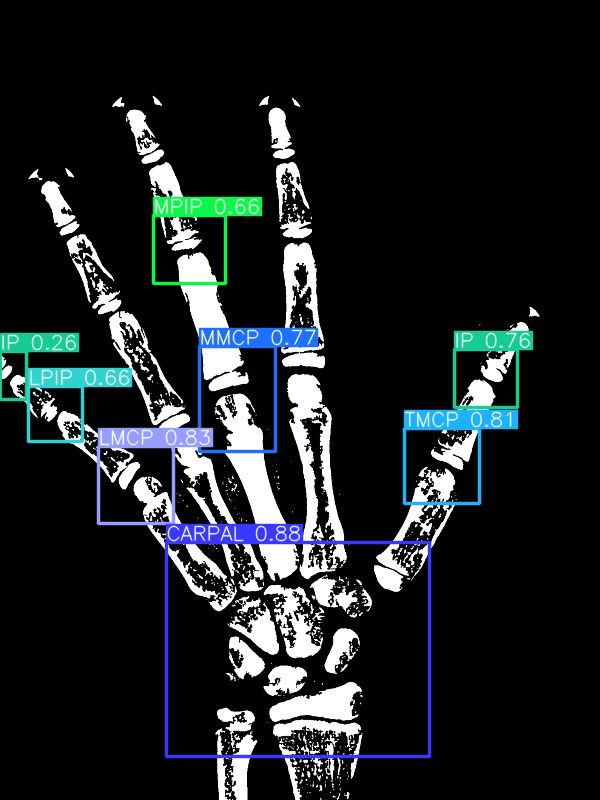

UnboundLocalError: ignored

In [10]:
path = '/content/Sample/남/97028583.bmp'
gender,he,year,tjnet,yolo,lms_df = basic(path)
file_name = os.path.basename(path).replace('bmp','jpg')

jpg_path = '/content/jpg/'
if not os.path.exists(jpg_path):
    os.makedirs(jpg_path)
# print(jpg_path+file_name)
processed_img = bone.Bone_extraction(path)


cv2.imwrite(jpg_path+file_name,processed_img)

crops, yoloimg, result = bone.yolo_crop_img(jpg_path+file_name,yolo)


# out_crop_img 에서 오류남
# yolo confidence (0.55) 이상 잡는 법 구축하면 모든거 해결 완료 !!
# cv2_imshow(crops)
cv2_imshow(yoloimg)
# cv2_imshow(result)

X = bone.out_crop_img(crops,gender)
global prediction_BA
prediction_BA = bone.predict_zscore(X, tjnet)
prediction_BA = prediction_BA.round(2)
prediction_H = bone.Height_prediction(gender,prediction_BA,he,lms_df)

print(prediction_BA)
print(prediction_H)

In [7]:
data = pd.read_excel('/content/Sample/골연령측정자료220307.xlsx')
display(data)

,No,sex,생년월일,촬영일자,Cage,촬영일키,Patient #
0,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1,103.0,M,1992-09-07,2004-05-19,11.700000,138.0,97028583.0
2,106.0,M,1992-09-08,2004-08-04,11.905556,143.0,10073987.0
3,101.0,M,1992-08-06,2003-09-17,11.113889,137.5,96248548.0
4,107.0,M,1991-10-01,2003-09-17,11.961111,135.8,10431539.0
5,111.0,M,1990-03-16,2002-09-24,12.522222,149.9,96579259.0
6,115.0,M,1990-10-04,2003-07-23,12.802778,150.7,10181949.0
7,117.0,M,1991-09-12,2004-11-17,13.180556,146.1,96178702.0
8,121.0,M,1990-06-07,2004-01-28,13.641667,167.0,10406334.0
9,124.0,M,1992-10-27,2006-10-25,13.994444,152.5,10353946.0


In [11]:
def out_crop_img(crop, gender):
    gender = np.array(gender).reshape(1,1)

    for i in range(7):
        carpal = re.compile('CARPAL.')
        ip = re.compile('IP.')
        lmcp = re.compile('LMCP.')
        lpip = re.compile('LPIP.')
        mmcp = re.compile('MMCP.')
        mpip = re.compile('MPIP.')
        tmcp = re.compile('TMCP.')

        if carpal.search(crop[i]['label']):
            CARPAL_img = crop[i]['im']
            CARPAL_img = cv2.resize(CARPAL_img, (224,224),cv2.INTER_AREA)
            CARPAL_img = np.expand_dims(CARPAL_img, axis=0)

        if ip.search(crop[i]['label']):
            IP_img = crop[i]['im']
            IP_img = cv2.resize(IP_img, (75,75),cv2.INTER_AREA)
            IP_img = np.expand_dims(IP_img, axis=0)
            
        if lmcp.search(crop[i]['label']):
            LMCP_img = crop[i]['im']
            LMCP_img = cv2.resize(LMCP_img, (75,75),cv2.INTER_AREA)
            LMCP_img = np.expand_dims(LMCP_img, axis=0)

        if lpip.search(crop[i]['label']):
            LPIP_img = crop[i]['im']
            LPIP_img = cv2.resize(LPIP_img, (75,75),cv2.INTER_AREA)
            LPIP_img = np.expand_dims(LPIP_img, axis=0)
        
        if mmcp.search(crop[i]['label']):
            MMCP_img = crop[i]['im']
            MMCP_img = cv2.resize(MMCP_img, (75,75),cv2.INTER_AREA)
            MMCP_img = np.expand_dims(MMCP_img, axis=0)
            
        if mpip.search(crop[i]['label']):
            MPIP_img = crop[i]['im']
            MPIP_img = cv2.resize(MPIP_img, (75,75),cv2.INTER_AREA)
            MPIP_img = np.expand_dims(MPIP_img, axis=0)

        if tmcp.search(crop[i]['label']):
            TMCP_img = crop[i]['im']
            TMCP_img = cv2.resize(TMCP_img, (75,75),cv2.INTER_AREA)
            TMCP_img = np.expand_dims(TMCP_img, axis=0)

        else : continue
    X = [CARPAL_img, LMCP_img, MMCP_img,TMCP_img, LPIP_img, MPIP_img, IP_img, gender]

    return X



# yolo_crop_img
def yolo_crop_img(save_path, yolo):
        result = yolo(save_path)
        crops = result.crop(save=False)
        img = np.squeeze(result.render())
        return crops, img, result

In [ ]:
out_crop_img()